### Fashion MNIST dataset Project

A mini project by Prateek Paul meprateekpaul@gmail.com

In [4]:
## IMPORTING DATASET
from keras.datasets import fashion_mnist
data = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

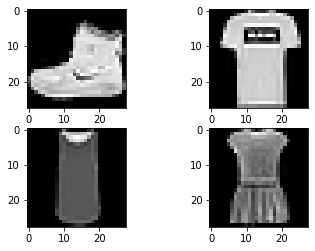

In [7]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [11]:
# Normalizing values from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu'))  ## hidden layer 1
model.add(Dense(64, activation='relu'))  ## hidden layer 2
model.add(Dense(128, activation='relu'))  ## hidden layer 3
model.add(Dense(256, activation='relu'))  ## hidden layer 4
model.add(Dense(512, activation='relu'))  ## hidden layer 5
model.add(Dense(10, activation='softmax'))  ## output layer, 10 = number of classes

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 205,290
Trainable params: 205,290
Non-trainable params: 0
________________________________________________

In [19]:
model.fit(X_train, y_train, validation_split=0.2 , epochs=20, batch_size=100)

Epoch 1/20
480/480 [==============================] - 5s 9ms/step - loss: 0.8356 - accuracy: 0.6964 - val_loss: 0.4873 - val_accuracy: 0.8184
Epoch 2/20
480/480 [==============================] - 4s 8ms/step - loss: 0.4281 - accuracy: 0.8460 - val_loss: 0.3784 - val_accuracy: 0.8609
Epoch 3/20
480/480 [==============================] - 4s 8ms/step - loss: 0.3676 - accuracy: 0.8642 - val_loss: 0.3759 - val_accuracy: 0.8606
Epoch 4/20
480/480 [==============================] - 4s 8ms/step - loss: 0.3421 - accuracy: 0.8721 - val_loss: 0.3563 - val_accuracy: 0.8688
Epoch 5/20
480/480 [==============================] - 4s 8ms/step - loss: 0.3302 - accuracy: 0.8777 - val_loss: 0.3647 - val_accuracy: 0.8633
Epoch 6/20
480/480 [==============================] - 4s 9ms/step - loss: 0.3184 - accuracy: 0.8822 - val_loss: 0.3556 - val_accuracy: 0.8692
Epoch 7/20
480/480 [==============================] - 4s 8ms/step - loss: 0.2968 - accuracy: 0.8897 - val_loss: 0.3324 - val_accuracy: 0.8798
Epoch 

In [20]:
scores = model.evaluate(X_test, y_test)
print(scores)   ## returns loss and accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8785
[0.37992218136787415, 0.8784999847412109]
